1.資料清理與視覺化圖表

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('HW2_heart.csv')
df.info() #可看出無遺漏值
df.duplicated()#查看有無重複值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Length: 918, dtype: bool

In [2]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

In [3]:
heart=(df['HeartDisease'] == 1)
heart1=(df['HeartDisease'] == 0) | (df['HeartDisease'] == 1)
heart_df = df.loc[heart]
heart_df1 = df.loc[heart1]
heart_df.loc[df['Sex'] == "M", 'Sex'] = "Male with Heart Disease"
heart_df.loc[df['Sex'] == "F", 'Sex'] = "Female with Heart Disease"
heart_df1.loc[df['HeartDisease'] == 0, 'HeartDisease'] = "No Heart Disease"
heart_df1.loc[df['HeartDisease'] == 1, 'HeartDisease'] = "Have Heart Disease"

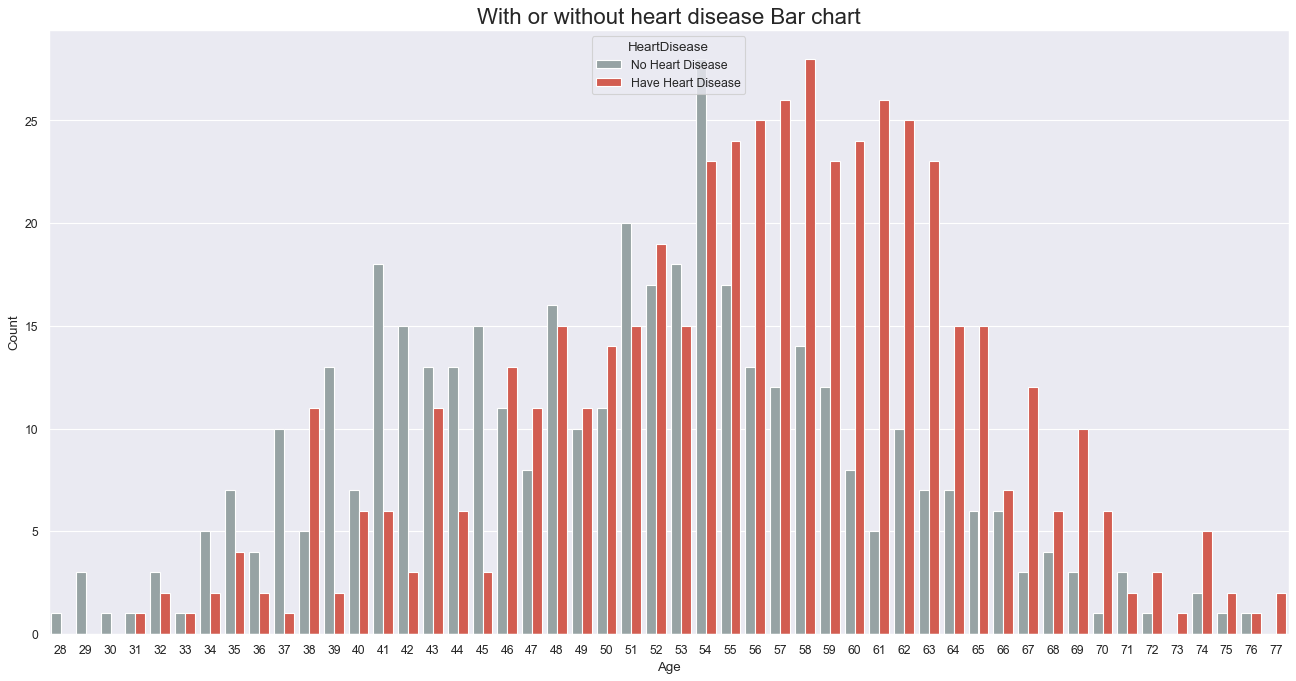

In [4]:
#有無heart disease的長條圖
plt.figure(figsize = (20,10), dpi = 80)
sns.set()
sns.countplot(x = "Age", hue = "HeartDisease", data = heart_df1, palette = flatui[2:])
plt.title("With or without heart disease Bar chart", fontsize = 20)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

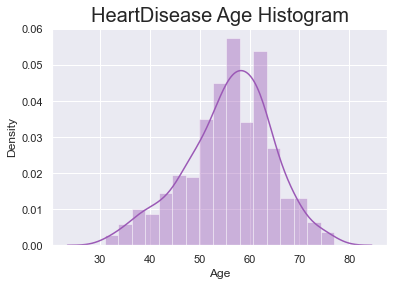

In [5]:
#有heart disease的Age直方圖
sns.set()
sns.set_palette(sns.color_palette(flatui))
sns.distplot(heart_df.Age)
plt.title('HeartDisease Age Histogram', fontsize = 20)
plt.xlabel('Age')
plt.ylabel("Density")
plt.show()

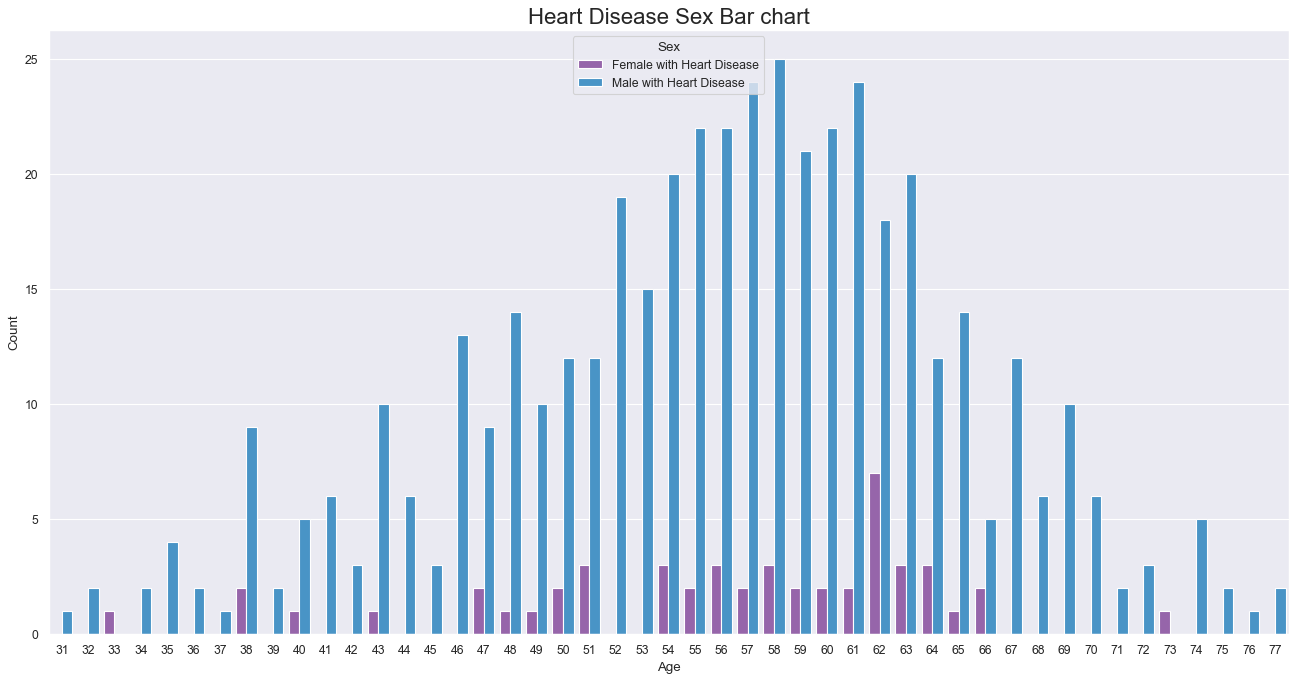

In [6]:
#男女有heart disease的長條圖
plt.figure(figsize = (20,10), dpi = 80)
sns.set()
sns.countplot(x = "Age", hue = "Sex", data = heart_df, palette = flatui)
plt.title("Heart Disease Sex Bar chart", fontsize = 20)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [7]:
#把Sex轉成0/1
df.loc[df['Sex'] == 'F', 'Sex'] = 0
df.loc[df['Sex'] == 'M', 'Sex'] = 1
df['Sex'] = df['Sex'].astype('int64')

In [8]:
#把ChestPainType轉成0/1/2/3
df.loc[df['ChestPainType'] == "ASY", 'ChestPainType'] = 0
df.loc[df['ChestPainType'] == "TA", 'ChestPainType'] = 1
df.loc[df['ChestPainType'] == "ATA", 'ChestPainType'] = 2
df.loc[df['ChestPainType'] == "NAP", 'ChestPainType'] = 3
df['ChestPainType'] = df['ChestPainType'].astype('int64')

In [9]:
#把RestingECG轉成0/1/2
df.loc[df['RestingECG'] == "Normal", 'RestingECG'] = 0
df.loc[df['RestingECG'] == "ST", 'RestingECG'] = 1
df.loc[df['RestingECG'] == "LVH", 'RestingECG'] = 2
df['RestingECG'] = df['RestingECG'].astype('int64')

In [10]:
#把ExerciseAngina轉成0/1
df.loc[df['ExerciseAngina'] == 'Y', 'ExerciseAngina'] = 0
df.loc[df['ExerciseAngina'] == 'N', 'ExerciseAngina'] = 1
df['ExerciseAngina'] = df['ExerciseAngina'].astype('int64')

In [11]:
#把ST_Slope轉成0/1/2
df.loc[df['ST_Slope'] == "Up", 'ST_Slope'] = 1
df.loc[df['ST_Slope'] == "Flat", 'ST_Slope'] = 2
df.loc[df['ST_Slope'] == "Down", 'ST_Slope'] = 3
df['ST_Slope'] = df['ST_Slope'].astype('int64')

In [12]:
print(df)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              2        140          289          0           0   
1     49    0              3        160          180          0           0   
2     37    1              2        130          283          0           1   
3     48    0              0        138          214          0           0   
4     54    1              3        150          195          0           0   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              1        110          264          0           0   
914   68    1              0        144          193          1           0   
915   57    1              0        130          131          0           0   
916   57    0              2        130          236          0           2   
917   38    1              3        138          175          0           0   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  Hear

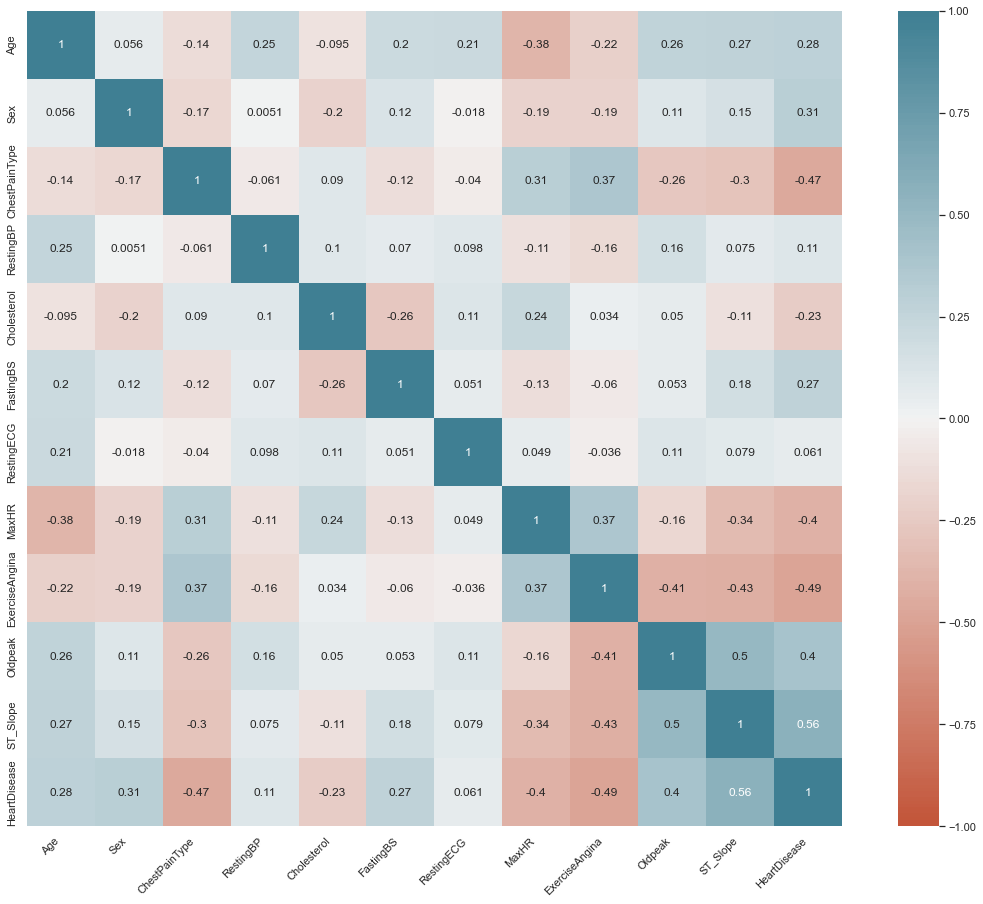

In [13]:
#把型態是object的轉換成數值後的相關係數熱度圖
corr = df.corr()
plt.figure(figsize = (20, 15))
ax = sns.heatmap(
    corr,  vmin = -1, vmax = 1, center = 0,
    cmap = sns.diverging_palette(20, 220, n = 200),
    square = True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right'
);

In [14]:
#還原特徵的真實含意

#Sex
df['Sex'][df['Sex'] == 0 ] = 'F'
df['Sex'][df['Sex'] == 1 ] = 'M'

#ChestPainType
df['ChestPainType'][df['ChestPainType'] == 0] = 'ASY'
df['ChestPainType'][df['ChestPainType'] == 1] = 'TA'
df['ChestPainType'][df['ChestPainType'] == 2] = 'ATA'
df['ChestPainType'][df['ChestPainType'] == 3] = 'NAP'

#RestingECG
df['RestingECG'][df['RestingECG'] == 0] = 'Normal'
df['RestingECG'][df['RestingECG'] == 1] = 'ST'
df['RestingECG'][df['RestingECG'] == 2] = 'LVH'
   
#ExerciseAngina
df['ExerciseAngina'][df['ExerciseAngina'] == 0] = 'Y'
df['ExerciseAngina'][df['ExerciseAngina'] == 1] = 'N'

#ST_Slope
df['ST_Slope'][df['ST_Slope'] == 1] = 'Up'
df['ST_Slope'][df['ST_Slope'] == 2] = 'Flat'
df['ST_Slope'][df['ST_Slope'] == 3] = 'Down'

df=pd.get_dummies(df)
df.to_csv('HW2_heart.csv', index = False)

In [15]:
#Heartdisease移到最後
df[['Age', 'HeartDisease']] = df[['Age', 'HeartDisease']].astype(str)
df['Heartdisease'] = df[['HeartDisease', 'Age']].apply(','.join, axis = 1)
df=df.drop('HeartDisease', axis = 1)
df['Heartdisease'] = df['Heartdisease'].apply(lambda x: x.split(',')[0])
df[['Heartdisease']] = df[['Heartdisease']].astype('int64')
df[['Age']] = df[['Age']].astype('int64')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   Sex_F              918 non-null    uint8  
 7   Sex_M              918 non-null    uint8  
 8   ChestPainType_ASY  918 non-null    uint8  
 9   ChestPainType_ATA  918 non-null    uint8  
 10  ChestPainType_NAP  918 non-null    uint8  
 11  ChestPainType_TA   918 non-null    uint8  
 12  RestingECG_LVH     918 non-null    uint8  
 13  RestingECG_Normal  918 non-null    uint8  
 14  RestingECG_ST      918 non-null    uint8  
 15  ExerciseAngina_N   918 non-null    uint8  
 16  ExerciseAngina_Y   918 non

2.敘述性統計分析

In [17]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Heartdisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,...,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.210240,0.789760,0.540305,0.188453,...,0.050109,0.204793,0.601307,0.193900,0.595861,0.404139,0.068627,0.501089,0.430283,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.407701,0.407701,0.498645,0.391287,...,0.218289,0.403770,0.489896,0.395567,0.490992,0.490992,0.252957,0.500271,0.495386,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


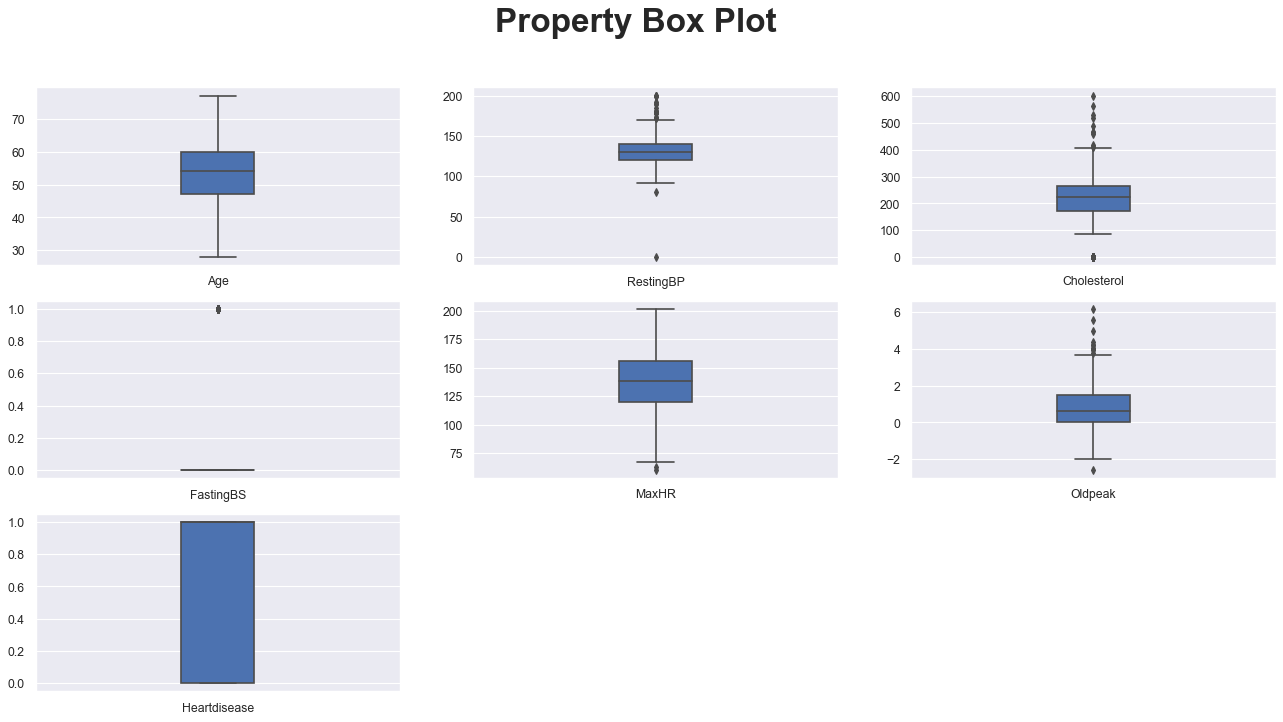

In [18]:
data_describe = df.select_dtypes(include = ['float64',  'int64'])
count = 1
plt.figure(figsize = (20, 10), dpi = 80)
for title in data_describe:
    plt.subplot(3, 3, count)
    sns.boxplot(data = df[[title]], orient = "v", whis = 1.5, saturation = 1, width = 0.2)
    count = count+1
plt.suptitle("Property Box Plot", fontsize = 30, fontweight = 'bold')
plt.show()

3.特徵相關性分析

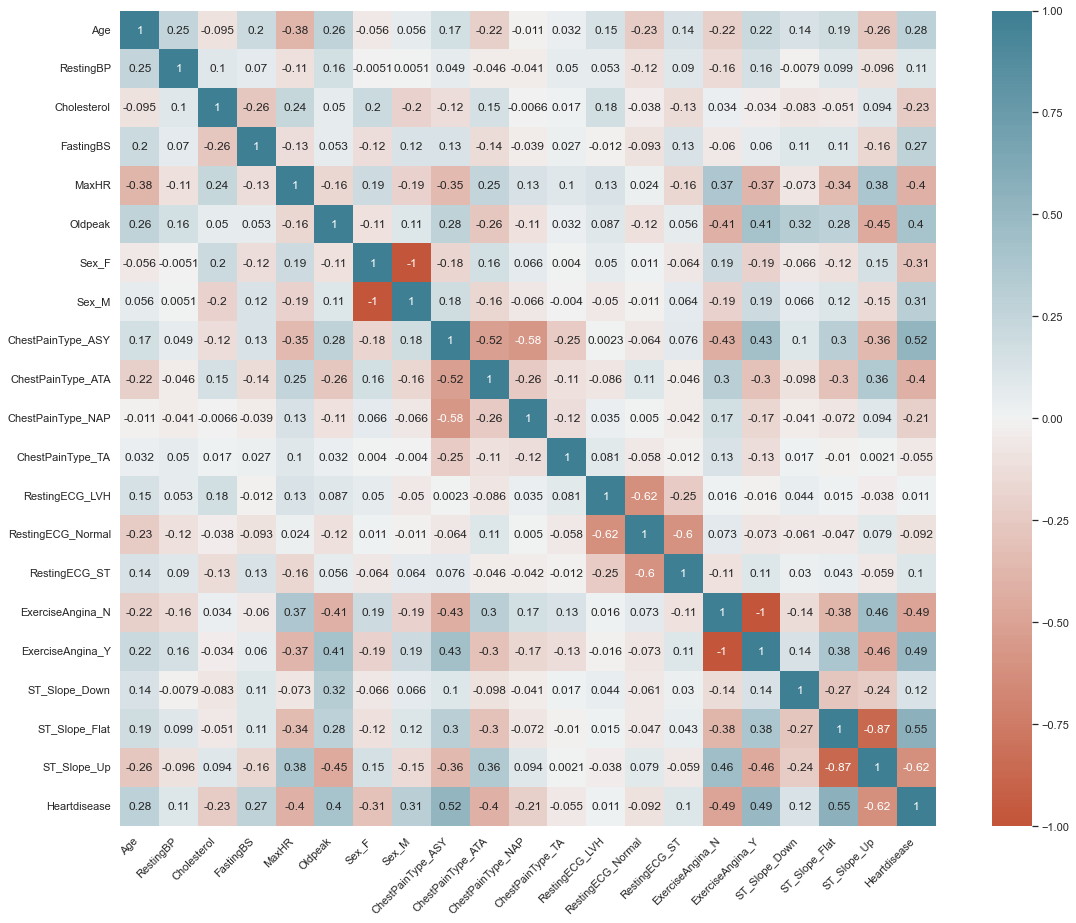

In [19]:
#相關係數熱度圖
corr = df.corr()
plt.figure(figsize = (20, 15))
ax = sns.heatmap(
    corr,  vmin = -1, vmax = 1, center = 0,
    cmap = sns.diverging_palette(20, 220, n = 200),
    square = True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right'
);

In [20]:
#皮爾森相關係數
corr_matrix = df.corr().abs()
corr_matrix

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Heartdisease
Age,1.000000,0.254399,0.095282,0.198039,0.382045,0.258612,0.055750,0.055750,0.166607,0.218165,...,0.032042,0.145727,0.230566,0.136798,0.215793,0.215793,0.138397,0.185568,0.258067,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,0.112135,0.164803,0.005133,0.005133,0.048824,0.046153,...,0.049855,0.053166,0.116851,0.090447,0.155101,0.155101,0.007912,0.099207,0.096146,0.107589
Cholesterol,0.095282,0.100893,1.000000,0.260974,0.235792,0.050148,0.200092,0.200092,0.120531,0.150954,...,0.017365,0.177077,0.038470,0.133106,0.034166,0.034166,0.083371,0.050953,0.094027,0.232741
FastingBS,0.198039,0.070193,0.260974,1.000000,0.131438,0.052698,0.120076,0.120076,0.131176,0.140514,...,0.026885,0.011656,0.093028,0.127110,0.060451,0.060451,0.105102,0.107006,0.161730,0.267291
MaxHR,0.382045,0.112135,0.235792,0.131438,1.000000,0.160691,0.189186,0.189186,0.354963,0.253735,...,0.100025,0.125793,0.023801,0.157879,0.370425,0.370425,0.073316,0.342581,0.383397,0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,0.160691,1.000000,0.105734,0.105734,0.280026,0.262124,...,0.032231,0.086794,0.116719,0.055958,0.408752,0.408752,0.322130,0.283295,0.450577,0.403951
Sex_F,0.055750,0.005133,0.200092,0.120076,0.189186,0.105734,1.000000,1.000000,0.183876,0.161522,...,0.004031,0.049518,0.010634,0.063715,0.190664,0.190664,0.066036,0.116077,0.150942,0.305445
Sex_M,0.055750,0.005133,0.200092,0.120076,0.189186,0.105734,1.000000,1.000000,0.183876,0.161522,...,0.004031,0.049518,0.010634,0.063715,0.190664,0.190664,0.066036,0.116077,0.150942,0.305445
ChestPainType_ASY,0.166607,0.048824,0.120531,0.131176,0.354963,0.280026,0.183876,0.183876,1.000000,0.522432,...,0.249003,0.002289,0.063606,0.076438,0.430034,0.430034,0.103407,0.303645,0.359443,0.516716
ChestPainType_ATA,0.218165,0.046153,0.150954,0.140514,0.253735,0.262124,0.161522,0.161522,0.522432,1.000000,...,0.110679,0.085791,0.107941,0.046111,0.300365,0.300365,0.097754,0.304667,0.357588,0.401924


In [21]:
#斯皮爾曼相關矩陣
corr_matrix = df.corr(method = 'spearman')
corr_matrix

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Heartdisease
Age,1.000000,0.279390,-0.047156,0.201015,-0.365025,0.298250,-0.059940,0.059940,0.167977,-0.213471,...,0.050918,0.153701,-0.240570,0.141050,-0.215472,0.215472,0.142093,0.185322,-0.259706,0.289576
RestingBP,0.279390,1.000000,0.109481,0.066019,-0.107566,0.175313,-0.026817,0.026817,0.049925,-0.064109,...,0.056829,0.041546,-0.107680,0.090951,-0.164037,0.164037,-0.020473,0.108896,-0.099516,0.113866
Cholesterol,-0.047156,0.109481,1.000000,-0.192871,0.183900,0.051723,0.181370,-0.181370,-0.065570,0.123477,...,0.005189,0.180136,-0.057556,-0.112591,-0.017737,0.017737,-0.064045,-0.013589,0.046427,-0.139873
FastingBS,0.201015,0.066019,-0.192871,1.000000,-0.124527,0.098968,-0.120076,0.120076,0.131176,-0.140514,...,0.026885,-0.011656,-0.093028,0.127110,-0.060451,0.060451,0.105102,0.107006,-0.161730,0.267291
MaxHR,-0.365025,-0.107566,0.183900,-0.124527,1.000000,-0.205113,0.195850,-0.195850,-0.361027,0.256259,...,0.097394,0.122490,0.032388,-0.165141,0.391819,-0.391819,-0.082102,-0.344603,0.389926,-0.404827
Oldpeak,0.298250,0.175313,0.051723,0.098968,-0.205113,1.000000,-0.117704,0.117704,0.298786,-0.290731,...,0.037395,0.080240,-0.116890,0.062860,-0.444806,0.444806,0.271442,0.350589,-0.492653,0.419046
Sex_F,-0.059940,-0.026817,0.181370,-0.120076,0.195850,-0.117704,1.000000,-1.000000,-0.183876,0.161522,...,0.004031,0.049518,0.010634,-0.063715,0.190664,-0.190664,-0.066036,-0.116077,0.150942,-0.305445
Sex_M,0.059940,0.026817,-0.181370,0.120076,-0.195850,0.117704,-1.000000,1.000000,0.183876,-0.161522,...,-0.004031,-0.049518,-0.010634,0.063715,-0.190664,0.190664,0.066036,0.116077,-0.150942,0.305445
ChestPainType_ASY,0.167977,0.049925,-0.065570,0.131176,-0.361027,0.298786,-0.183876,0.183876,1.000000,-0.522432,...,-0.249003,0.002289,-0.063606,0.076438,-0.430034,0.430034,0.103407,0.303645,-0.359443,0.516716
ChestPainType_ATA,-0.213471,-0.064109,0.123477,-0.140514,0.256259,-0.290731,0.161522,-0.161522,-0.522432,1.000000,...,-0.110679,-0.085791,0.107941,-0.046111,0.300365,-0.300365,-0.097754,-0.304667,0.357588,-0.401924


In [22]:
#肯德爾相關係數
corr_matrix = df.corr(method = 'kendall')
corr_matrix

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Heartdisease
Age,1.000000,0.198278,-0.032254,0.166605,-0.253123,0.217774,-0.049679,0.049679,0.139223,-0.176929,...,0.042202,0.127390,-0.199389,0.116905,-0.178587,0.178587,0.117769,0.153598,-0.215249,0.240006
RestingBP,0.198278,1.000000,0.077313,0.055608,-0.075592,0.130237,-0.022588,0.022588,0.042052,-0.053999,...,0.047868,0.034994,-0.090699,0.076608,-0.138169,0.138169,-0.017245,0.091724,-0.083823,0.095910
Cholesterol,-0.032254,0.077313,1.000000,-0.160156,0.125987,0.038057,0.150606,-0.150606,-0.054448,0.102533,...,0.004309,0.149581,-0.047793,-0.093493,-0.014729,0.014729,-0.053181,-0.011284,0.038552,-0.116147
FastingBS,0.166605,0.055608,-0.160156,1.000000,-0.102513,0.086521,-0.120076,0.120076,0.131176,-0.140514,...,0.026885,-0.011656,-0.093028,0.127110,-0.060451,0.060451,0.105102,0.107006,-0.161730,0.267291
MaxHR,-0.253123,-0.075592,0.125987,-0.102513,1.000000,-0.150319,0.161226,-0.161226,-0.297203,0.210956,...,0.080176,0.100835,0.026662,-0.135947,0.322550,-0.322550,-0.067587,-0.283682,0.320992,-0.333259
Oldpeak,0.217774,0.130237,0.038057,0.086521,-0.150319,1.000000,-0.102901,0.102901,0.261210,-0.254169,...,0.032692,0.070149,-0.102189,0.054955,-0.388866,0.388866,0.237305,0.306499,-0.430696,0.366346
Sex_F,-0.049679,-0.022588,0.150606,-0.120076,0.161226,-0.102901,1.000000,-1.000000,-0.183876,0.161522,...,0.004031,0.049518,0.010634,-0.063715,0.190664,-0.190664,-0.066036,-0.116077,0.150942,-0.305445
Sex_M,0.049679,0.022588,-0.150606,0.120076,-0.161226,0.102901,-1.000000,1.000000,0.183876,-0.161522,...,-0.004031,-0.049518,-0.010634,0.063715,-0.190664,0.190664,0.066036,0.116077,-0.150942,0.305445
ChestPainType_ASY,0.139223,0.042052,-0.054448,0.131176,-0.297203,0.261210,-0.183876,0.183876,1.000000,-0.522432,...,-0.249003,0.002289,-0.063606,0.076438,-0.430034,0.430034,0.103407,0.303645,-0.359443,0.516716
ChestPainType_ATA,-0.176929,-0.053999,0.102533,-0.140514,0.210956,-0.254169,0.161522,-0.161522,-0.522432,1.000000,...,-0.110679,-0.085791,0.107941,-0.046111,0.300365,-0.300365,-0.097754,-0.304667,0.357588,-0.401924


4.資料分割與建置4個分類模型

In [23]:
#資料分割
from sklearn.model_selection import train_test_split
X = df.drop('Heartdisease',axis = 1)
y = df['Heartdisease']
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=100, train_size=0.8, test_size=0.2)
df_count = pd.concat([y.value_counts(),y_train.value_counts(), y_test.value_counts()],axis = 1)
df_count.columns = ['y', 'y_train', 'y_test']
df_count.head()     

,y,y_train,y_test
1,508,403,105
0,410,331,79


In [24]:
#標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [25]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

#混淆矩陣
def confuse_matrix(model_name, model, Xtest, Ytest):
    class_names = ['True ', 'False']
    disp = plot_confusion_matrix(model, Xtest, Ytest, display_labels=class_names, cmap= 'summer_r')
    disp.ax_.set_title('%s Confuse Matrix'%(model_name), fontsize=20)
    plt.grid()
    plt.show()

#k次交叉驗證
def cross_valid(model, Xtest, Ytest):
    print("交叉驗證結果:")
    print("Accurary:", round(cross_val_score(model, Xtest, Ytest, scoring = 'accuracy', cv=5).mean()*100,2),"%")
    print("Precision:", round(cross_val_score(model, Xtest, Ytest, scoring = 'precision',cv=5).mean()*100,2),"%")
    print("Recall:", round(cross_val_score(model, Xtest, Ytest, scoring = 'recall', cv=5).mean()*100,2),"%")
    print("F1-score:", round(cross_val_score(model, Xtest, Ytest, scoring = 'f1', cv=5).mean(),2))
    
#模型評估
def model_score(Ytest,Ypred):
    print("模型評估結果:")
    print("Accuracy:", round(accuracy_score(Ytest, Ypred)*100,2),"%")
    print("Precision:", round(precision_score(Ytest, Ypred)*100,2),"%")
    print("Recall:", round(recall_score(Ytest, Ypred)*100,2),"%")
    print("F1-score:", round(f1_score(Ytest, Ypred),2))

#分類報告
def class_report(Ytest, Ypred):
    print("分類報告:\n", classification_report(Ytest, Ypred))
    
#ROC/AUC曲線
def ROC_AUC(model_name, model, Xtest, Ytest):
    y_score = model.predict_proba(Xtest)[:,1]
    fpr, tpr, thresholds = roc_curve(Ytest, y_score)
    roc_auc = auc(fpr, tpr)
    plt.title('%s ROC/AUC'%(model_name), fontsize = 20)
    plt.plot(fpr, tpr, color='xkcd:azure', 
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    

OvR邏輯斯迴歸

In [26]:
#邏輯斯迴歸-OvR
from sklearn.linear_model import LogisticRegression
OvR_logit  = LogisticRegression(multi_class = 'ovr')
OvR_logit.fit(X_train, y_train)
print("OvR:", OvR_logit.score(X_test, y_test))
print('Descision function:\n', OvR_logit.decision_function(X_test)[:6])
print('Predicted Prob.:\n', OvR_logit.predict_proba(X_test)[:6,:])

OvR: 0.875
Descision function:
 [ 3.51067643  0.8113891  -1.87121667 -2.55123302  3.75691168 -2.72351291]
Predicted Prob.:
 [[0.02900998 0.97099002]
 [0.30759457 0.69240543]
 [0.86659899 0.13340101]
 [0.92765631 0.07234369]
 [0.02282272 0.97717728]
 [0.93839991 0.06160009]]


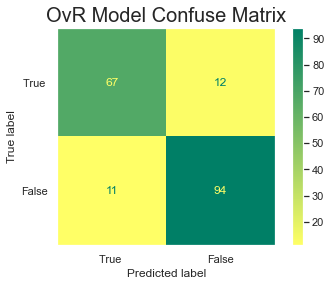

In [27]:
confuse_matrix("OvR Model", OvR_logit, X_test, y_test)

交叉驗證結果:
Accurary: 87.48 %
Precision: 86.98 %
Recall: 92.38 %
F1-score: 0.89
模型評估結果:
Accuracy: 87.5 %
Precision: 88.68 %
Recall: 89.52 %
F1-score: 0.89
分類報告:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85        79
           1       0.89      0.90      0.89       105

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184



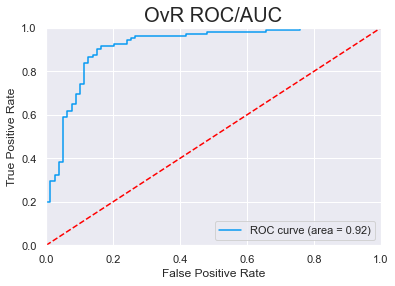

In [28]:
cross_valid(OvR_logit, X_test, y_test)
y_pred = OvR_logit.predict(X_test)
model_score(y_test, y_pred)
class_report(y_test, y_pred)
ROC_AUC("OvR", OvR_logit, X_test, y_test)

-----特徵篩選-----
門檻值 : 0.4197649945065998
特徵遮罩 : [False False False  True False False  True  True  True  True False False
 False False False False False False  True  True]


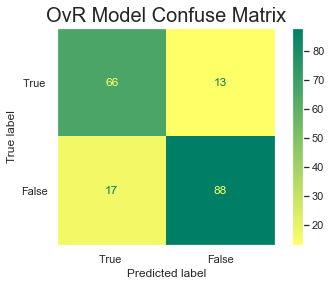

In [29]:
#篩選特徵
from sklearn.feature_selection import SelectFromModel
print("-----特徵篩選-----")
select = SelectFromModel(OvR_logit)
select.fit(X_train, y_train)
print('門檻值 :', select.threshold_)
print('特徵遮罩 :',select.get_support())
X_train_new = select.transform(X_train)
X_test_new = select.transform(X_test)
OvR_logit.fit(X_train_new, y_train)
y_pred_new=OvR_logit.predict(X_test_new)

confuse_matrix("OvR Model", OvR_logit, X_test_new, y_test)

交叉驗證結果:
Accurary: 80.44 %
Precision: 81.36 %
Recall: 86.67 %
F1-score: 0.83
模型評估結果:
Accuracy: 83.7 %
Precision: 87.13 %
Recall: 83.81 %
F1-score: 0.85
分類報告:
               precision    recall  f1-score   support

           0       0.80      0.84      0.81        79
           1       0.87      0.84      0.85       105

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.84      0.84       184



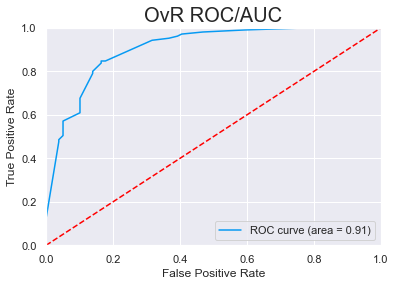

In [30]:
cross_valid(OvR_logit, X_test_new, y_test)
model_score(y_test, y_pred_new)
class_report(y_test, y_pred_new)
ROC_AUC("OvR", OvR_logit, X_test_new, y_test)

OvO邏輯斯迴歸

In [31]:
#邏輯斯迴歸-OvO
OvO_logit  = LogisticRegression(multi_class = 'multinomial')
OvO_logit.fit(X_train, y_train)
y_pred = OvO_logit.predict(X_test)
print("OvO:", OvO_logit.score(X_test, y_test))
print('Descision function:\n', OvO_logit.decision_function(X_test)[:6])
print('Predicted Prob.:\n', OvO_logit.predict_proba(X_test)[:6,:])

OvO: 0.875
Descision function:
 [ 1.77183215  0.55323815 -0.87629808 -1.27281252  1.83923344 -1.43243738]
Predicted Prob.:
 [[0.02809506 0.97190494]
 [0.2485284  0.7514716 ]
 [0.85227995 0.14772005]
 [0.92727905 0.07272095]
 [0.02463925 0.97536075]
 [0.9460825  0.0539175 ]]


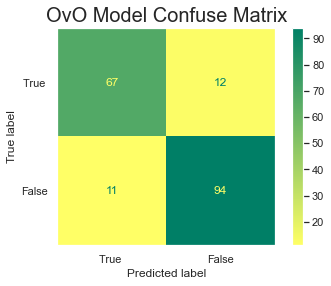

In [32]:
confuse_matrix("OvO Model", OvO_logit, X_test, y_test)

交叉驗證結果:
Accurary: 88.02 %
Precision: 87.71 %
Recall: 92.38 %
F1-score: 0.9
模型評估結果:
Accuracy: 87.5 %
Precision: 88.68 %
Recall: 89.52 %
F1-score: 0.89
分類報告:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85        79
           1       0.89      0.90      0.89       105

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184



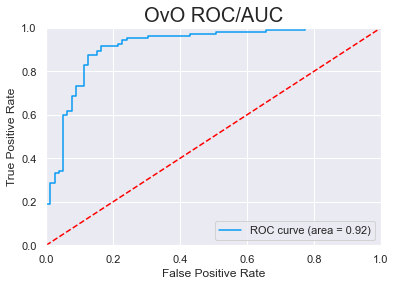

In [33]:
cross_valid(OvO_logit, X_test, y_test)
model_score(y_test, y_pred)
class_report(y_test, y_pred)
ROC_AUC("OvO", OvO_logit, X_test, y_test)

-----特徵篩選-----
門檻值 : 0.21948692188425914
特徵遮罩 : [False False False  True False False  True  True  True  True False False
 False False False  True False False  True  True]


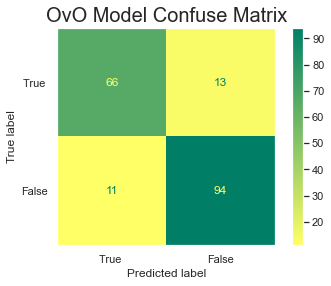

In [34]:
#篩選特徵
from sklearn.feature_selection import SelectFromModel
print("-----特徵篩選-----")
select = SelectFromModel(OvO_logit)
select.fit(X_train, y_train)
print('門檻值 :', select.threshold_)
print('特徵遮罩 :',select.get_support())
X_train_new = select.transform(X_train)
X_test_new = select.transform(X_test)
OvO_logit.fit(X_train_new, y_train)
y_pred_new=OvO_logit.predict(X_test_new)

confuse_matrix("OvO Model", OvO_logit, X_test_new, y_test)

交叉驗證結果:
Accurary: 85.87 %
Precision: 85.13 %
Recall: 91.43 %
F1-score: 0.88
模型評估結果:
Accuracy: 86.96 %
Precision: 87.85 %
Recall: 89.52 %
F1-score: 0.89
分類報告:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85        79
           1       0.88      0.90      0.89       105

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



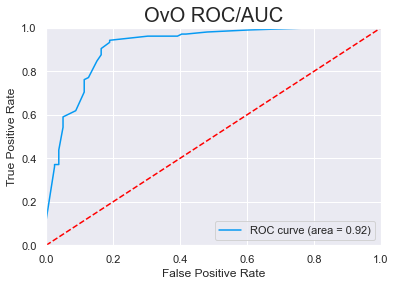

In [35]:
cross_valid(OvO_logit, X_test_new, y_test)
model_score(y_test, y_pred_new)
class_report(y_test, y_pred_new)
ROC_AUC("OvO", OvO_logit, X_test_new, y_test)

SVM

In [36]:
#建立SVM分類器
from sklearn.svm import LinearSVC
svm = LinearSVC(max_iter=1500)
svm.fit(X_train_std, y_train)
y_pred=svm.predict(X_test_std)

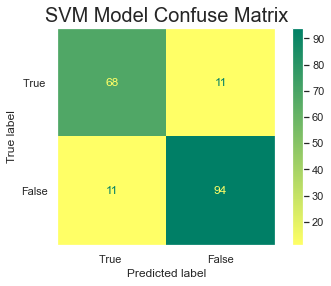

In [37]:
confuse_matrix("SVM Model", svm, X_test_std, y_test)

In [38]:
cross_valid(svm, X_test_std, y_test)
model_score(y_test, y_pred)
class_report(y_test, y_pred)

交叉驗證結果:
Accurary: 85.86 %
Precision: 84.01 %
Recall: 93.33 %
F1-score: 0.88
模型評估結果:
Accuracy: 88.04 %
Precision: 89.52 %
Recall: 89.52 %
F1-score: 0.9
分類報告:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        79
           1       0.90      0.90      0.90       105

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



-----特徵篩選-----
門檻值 : 0.13302915444533886
特徵遮罩 : [False False False  True False False  True  True  True  True False False
 False False False False  True False  True  True]


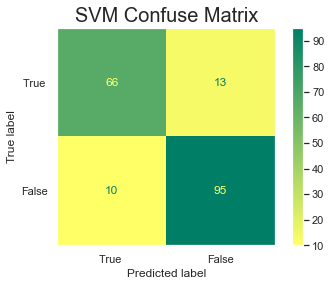

In [39]:
#篩選特徵
from sklearn.feature_selection import SelectFromModel
print("-----特徵篩選-----")
select = SelectFromModel(svm)
select.fit(X_train, y_train)
print('門檻值 :', select.threshold_)
print('特徵遮罩 :',select.get_support())
X_train_new = select.transform(X_train)
X_test_new = select.transform(X_test)
svm.fit(X_train_new, y_train)
y_pred_new=svm.predict(X_test_new)

confuse_matrix("SVM", svm, X_test_new, y_test)

In [40]:
cross_valid(svm, X_test_new, y_test)
model_score(y_test, y_pred_new)
class_report(y_test, y_pred_new)

交叉驗證結果:
Accurary: 85.87 %
Precision: 85.13 %
Recall: 91.43 %
F1-score: 0.88
模型評估結果:
Accuracy: 87.5 %
Precision: 87.96 %
Recall: 90.48 %
F1-score: 0.89
分類報告:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85        79
           1       0.88      0.90      0.89       105

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184



決策樹分類

In [41]:
from sklearn.tree import DecisionTreeClassifier
# 建立決策樹分類器
tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)

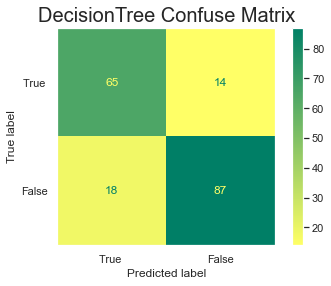

In [42]:
confuse_matrix("DecisionTree", tree_clf, X_test, y_test)

交叉驗證結果:
Accurary: 77.18 %
Precision: 77.28 %
Recall: 86.67 %
F1-score: 0.82
模型評估結果:
Accuracy: 82.61 %
Precision: 86.14 %
Recall: 82.86 %
F1-score: 0.84
分類報告:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80        79
           1       0.86      0.83      0.84       105

    accuracy                           0.83       184
   macro avg       0.82      0.83      0.82       184
weighted avg       0.83      0.83      0.83       184



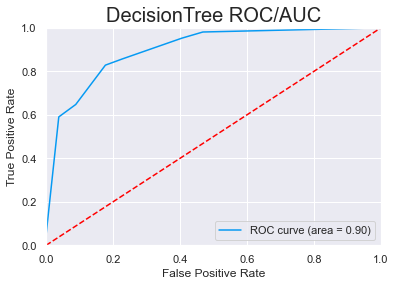

In [43]:
cross_valid(tree_clf, X_test, y_test)
model_score(y_test, y_pred)
class_report(y_test, y_pred)
ROC_AUC("DecisionTree", tree_clf, X_test, y_test)

-----特徵篩選-----
門檻值 : 0.05
特徵遮罩 : [False False  True False False False  True False  True False False False
 False False False False False False False  True]


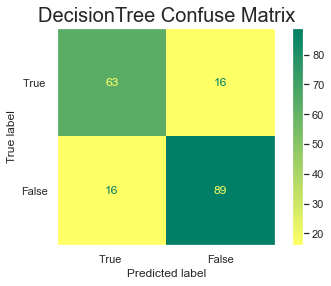

In [44]:
#篩選特徵
from sklearn.feature_selection import SelectFromModel
print("-----特徵篩選-----")
select = SelectFromModel(tree_clf)
select.fit(X_train, y_train)
print('門檻值 :', select.threshold_)
print('特徵遮罩 :',select.get_support())
X_train_new = select.transform(X_train)
X_test_new = select.transform(X_test)
tree_clf.fit(X_train_new, y_train)
y_pred_new=tree_clf.predict(X_test_new)

confuse_matrix("DecisionTree", tree_clf, X_test_new, y_test)

交叉驗證結果:
Accurary: 76.08 %
Precision: 80.95 %
Recall: 77.14 %
F1-score: 0.79
模型評估結果:
Accuracy: 82.61 %
Precision: 84.76 %
Recall: 84.76 %
F1-score: 0.85
分類報告:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        79
           1       0.85      0.85      0.85       105

    accuracy                           0.83       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



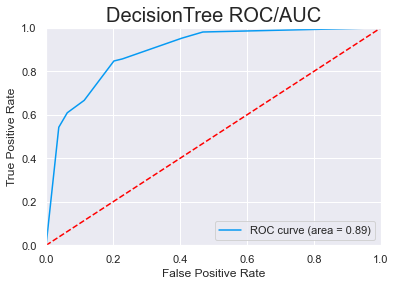

In [45]:
cross_valid(tree_clf, X_test_new, y_test)
model_score(y_test, y_pred_new)
class_report(y_test, y_pred_new)
ROC_AUC("DecisionTree", tree_clf, X_test_new, y_test)

隨機森林

In [46]:
from sklearn.ensemble import RandomForestClassifier

randomforest_clf = RandomForestClassifier(max_depth=3, n_jobs=-1)
randomforest_clf.fit(X_train, y_train)
y_pred = randomforest_clf.predict(X_test)

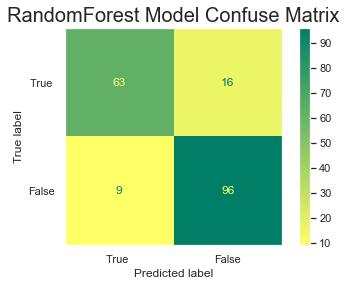

In [47]:
confuse_matrix("RandomForest Model", randomforest_clf, X_test, y_test)

交叉驗證結果:
Accurary: 86.95 %
Precision: 85.0 %
Recall: 94.29 %
F1-score: 0.89
模型評估結果:
Accuracy: 86.41 %
Precision: 85.71 %
Recall: 91.43 %
F1-score: 0.88
分類報告:
               precision    recall  f1-score   support

           0       0.88      0.80      0.83        79
           1       0.86      0.91      0.88       105

    accuracy                           0.86       184
   macro avg       0.87      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



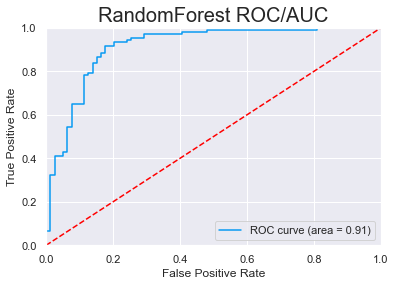

In [48]:
cross_valid(randomforest_clf, X_test, y_test)
model_score(y_test, y_pred)
class_report(y_test, y_pred)
ROC_AUC("RandomForest", randomforest_clf, X_test, y_test)

-----特徵篩選-----
門檻值 : 0.05
特徵遮罩 : [False False False False  True  True False False  True False False False
 False False False  True  True False  True  True]


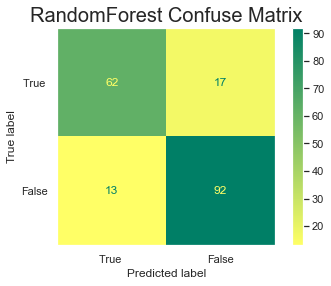

In [49]:
#篩選特徵
from sklearn.feature_selection import SelectFromModel
print("-----特徵篩選-----")
select = SelectFromModel(randomforest_clf)
select.fit(X_train, y_train)
print('門檻值 :', select.threshold_)
print('特徵遮罩 :',select.get_support())
X_train_new = select.transform(X_train)
X_test_new = select.transform(X_test)
randomforest_clf.fit(X_train_new, y_train)
y_pred_new =randomforest_clf.predict(X_test_new)

confuse_matrix("RandomForest", randomforest_clf, X_test_new, y_test)

交叉驗證結果:
Accurary: 85.33 %
Precision: 83.36 %
Recall: 93.33 %
F1-score: 0.88
模型評估結果:
Accuracy: 83.7 %
Precision: 84.4 %
Recall: 87.62 %
F1-score: 0.86
分類報告:
               precision    recall  f1-score   support

           0       0.83      0.78      0.81        79
           1       0.84      0.88      0.86       105

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



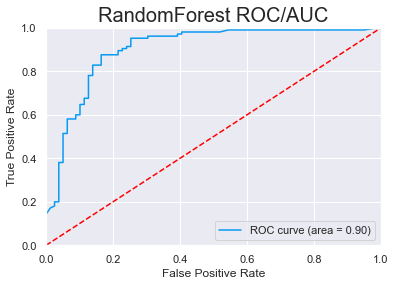

In [50]:
cross_valid(randomforest_clf, X_test_new, y_test)
model_score(y_test, y_pred_new)
class_report(y_test, y_pred_new)
ROC_AUC("RandomForest", randomforest_clf, X_test_new, y_test)

K-NN

In [51]:
from sklearn.neighbors import KNeighborsClassifier

# 建立 KNN 分類器，預設 k=5
knn = KNeighborsClassifier(n_jobs=-1)
knn.fit(X_train_std, y_train)
y_pred=knn.predict(X_test_std)

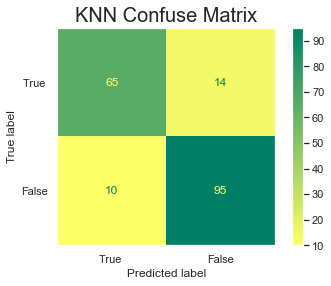

In [52]:
confuse_matrix("KNN", knn, X_test_std, y_test)

交叉驗證結果:
Accurary: 86.95 %
Precision: 88.17 %
Recall: 89.52 %
F1-score: 0.89
模型評估結果:
Accuracy: 86.96 %
Precision: 87.16 %
Recall: 90.48 %
F1-score: 0.89
分類報告:
               precision    recall  f1-score   support

           0       0.87      0.82      0.84        79
           1       0.87      0.90      0.89       105

    accuracy                           0.87       184
   macro avg       0.87      0.86      0.87       184
weighted avg       0.87      0.87      0.87       184



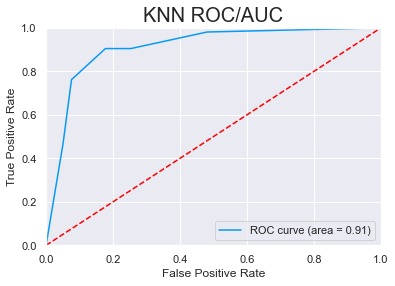

In [53]:
cross_valid(knn, X_test_std, y_test)
model_score(y_test, y_pred)
class_report(y_test, y_pred)
ROC_AUC("KNN", knn, X_test_std, y_test)

-----特徵篩選-----


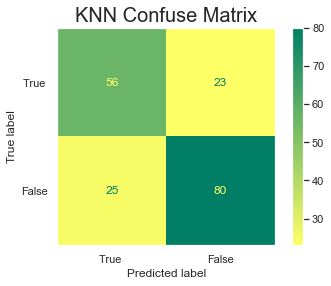

In [54]:
#篩選特徵
from sklearn.feature_selection import SelectKBest, f_regression
print("-----特徵篩選-----")
select = SelectKBest(f_regression, k=3)
select.fit(X_train, y_train)
X_train_new = select.transform(X_train)
scale = StandardScaler().fit(X_train_new)
X_train_std = scale.transform(X_train_new)
X_test_new = select.transform(X_test)
X_test_std = scale.transform(X_test_new)
knn.fit(X_train_std, y_train)
y_pred_new =knn.predict(X_test_std)

confuse_matrix("KNN", knn, X_test_std, y_test)

交叉驗證結果:
Accurary: 76.02 %
Precision: 73.47 %
Recall: 91.43 %
F1-score: 0.81
模型評估結果:
Accuracy: 73.91 %
Precision: 77.67 %
Recall: 76.19 %
F1-score: 0.77
分類報告:
               precision    recall  f1-score   support

           0       0.69      0.71      0.70        79
           1       0.78      0.76      0.77       105

    accuracy                           0.74       184
   macro avg       0.73      0.74      0.73       184
weighted avg       0.74      0.74      0.74       184



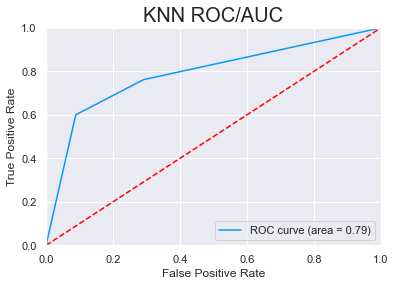

In [55]:
cross_valid(knn, X_test_std, y_test)
model_score(y_test, y_pred_new)
class_report(y_test, y_pred_new)
ROC_AUC("KNN", knn, X_test_std, y_test)